Columnas originales: Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023',
       'Unnamed: 68'],
      dtype='object')
Columnas después del filtro: Index(['Indicator Name', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022', '2023'],
      dtype='object')

Índices y nombres de las columnas antes de eliminar:
0: Indicator Name
1: 2015
2: 2016
3: 2017
4: 2018
5: 2019
6: 2020
7: 2021
8: 2022
9: 2023


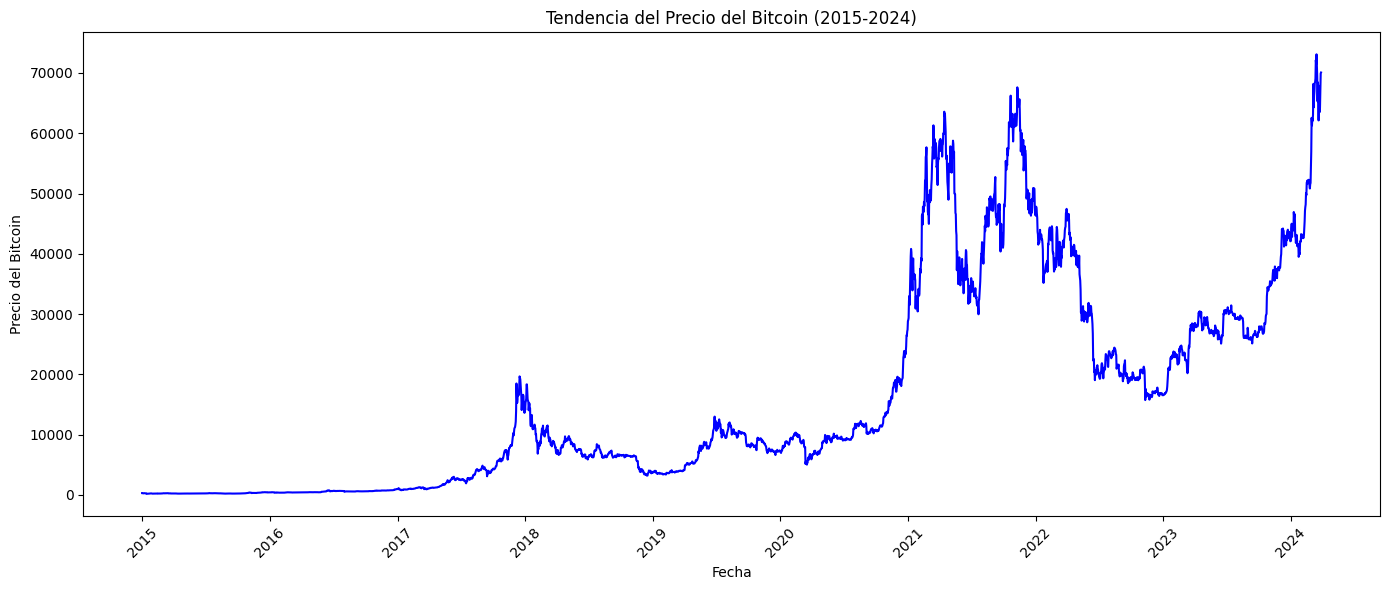

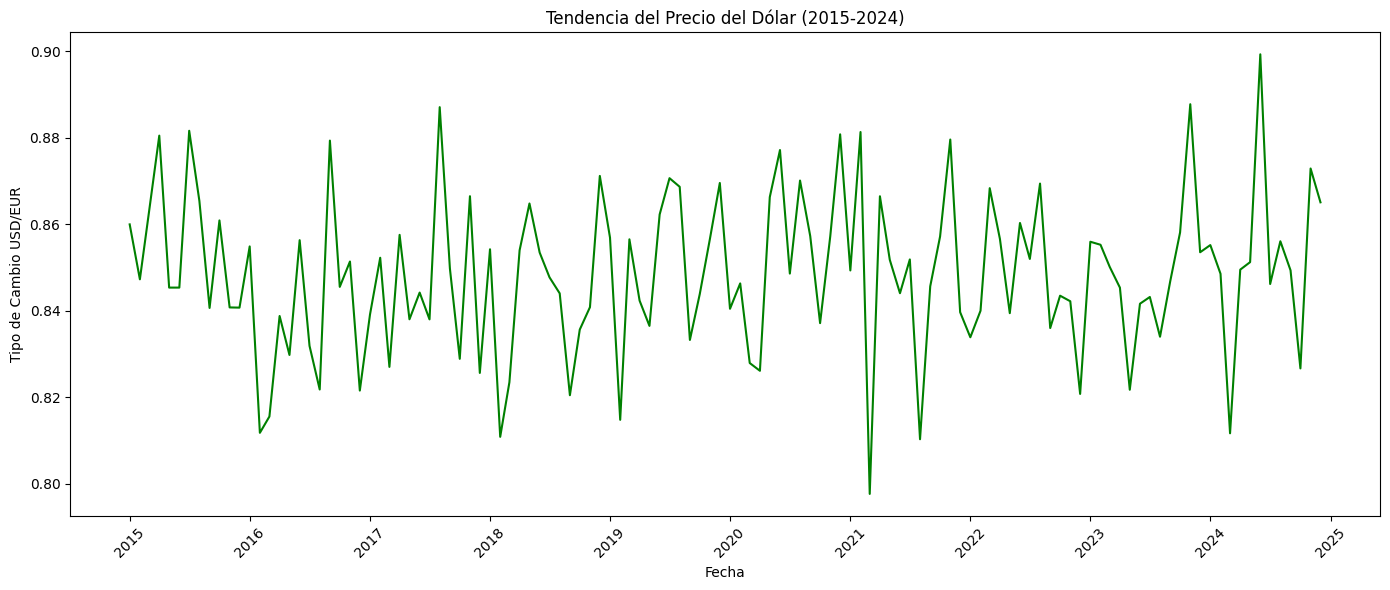

               Producto  Precio 2019  Precio 2024
0  Quintal Arroz Blanco        39.57        45.78
1   Quintal Frijol Rojo        55.15        87.19
2          Quintal Maiz        18.86        23.35
3          Huevo Unidad         0.11         0.15


In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar datos
DatosBitcoin = pd.read_csv("bitcoin.csv")
DatosValorUSD = pd.read_csv("USD-EUR-2015-2024.csv")
DatosBancoCentral = pd.read_csv("InfoBancoCentral.csv", skiprows=4)

# Procesar DatosBancoCentral
DatosBancoCentral = DatosBancoCentral.drop(DatosBancoCentral.columns[4:59], axis=1)
DatosBancoCentral = DatosBancoCentral.iloc[4:27]

# Verificar las columnas originales antes de filtrar
print("Columnas originales:", DatosBancoCentral.columns)

# Mantener 'Indicator Name' y las columnas de datos numéricos (años)
DatosBancoCentral = DatosBancoCentral.loc[:, 
    (DatosBancoCentral.columns.str.contains('exportaciones|importaciones|turismo', case=False, na=False)) |
    (DatosBancoCentral.columns == 'Indicator Name') |  # Incluir 'Indicator Name'
    (DatosBancoCentral.columns.str.match(r'^\d{4}$'))  # Incluir columnas con años (e.g., 2015, 2016)
]

# Verificar las columnas después del filtro
print("Columnas después del filtro:", DatosBancoCentral.columns)

# Filtrar exportaciones, importaciones y turismo por filas
exportaciones = DatosBancoCentral[DatosBancoCentral['Indicator Name'].str.contains("Exportaciones", case=False, na=False)].copy()
importaciones = DatosBancoCentral[DatosBancoCentral['Indicator Name'].str.contains("Importaciones", case=False, na=False)].copy()
turismo = DatosBancoCentral[DatosBancoCentral['Indicator Name'].str.contains("Turismo", case=False, na=False)].copy()

# Verificar las columnas existentes y sus índices después de filtrar
print("\nÍndices y nombres de las columnas antes de eliminar:")
for idx, col in enumerate(DatosBancoCentral.columns):
    print(f"{idx}: {col}")

# Convertir formatos de fecha
DatosBitcoin['date'] = pd.to_datetime(DatosBitcoin['date'])
DatosValorUSD['Month_Year'] = pd.to_datetime(DatosValorUSD['Month_Year'], format='%m-%Y')

# Graficar tendencias del precio del Bitcoin
plt.figure(figsize=(14, 6))
sns.lineplot(data=DatosBitcoin, x='date', y='price', color='blue')
plt.title('Tendencia del Precio del Bitcoin (2015-2024)')
plt.xlabel('Fecha')
plt.ylabel('Precio del Bitcoin')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Graficar tendencias del tipo de cambio USD/EUR
plt.figure(figsize=(14, 6))
sns.lineplot(data=DatosValorUSD, x='Month_Year', y='USD_EUR_Exchange_Rate', color='green')
plt.title('Tendencia del Precio del Dólar (2015-2024)')
plt.xlabel('Fecha')
plt.ylabel('Tipo de Cambio USD/EUR')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Mostrar estructura de DatosBancoCentral procesado
DatosBancoCentral

data = {
    "Producto": ["Quintal Arroz Blanco", "Quintal Frijol Rojo", "Quintal Maiz", "Huevo Unidad"],
    "Precio 2019": [39.57, 55.15, 18.86, 0.11],
    "Precio 2024": [45.78, 87.19, 23.35, 0.15]
}

df = pd.DataFrame(data)
print(df)


C:\Users\PC\AppData\Local\Temp\ipykernel_11716\3981924632.py:35: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  'Transporte y Servicios': DatosIPC[DatosIPC.index.str.contains(r'(Transporte|Comunicaciones|Salud|Alojamiento)', case=False)],  # Filtra por palabras clave
C:\Users\PC\AppData\Local\Temp\ipykernel_11716\3981924632.py:36: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  'Educacion y Cultura': DatosIPC[DatosIPC.index.str.contains(r'(Educación|Recreación)', case=False)],  # Filtra por palabras clave
C:\Users\PC\AppData\Local\Temp\ipykernel_11716\3981924632.py:37: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  'Otros Bienes y Servicios': DatosIPC[DatosIPC.index.str.contains(r'(Restaurantes|Bienes y servicios diversos)', ca

Guardado: Indice_General_y_Subgrupos_Principales.csv
Graficando: Indice General y Subgrupos Principales con gráfico tipo lineplot


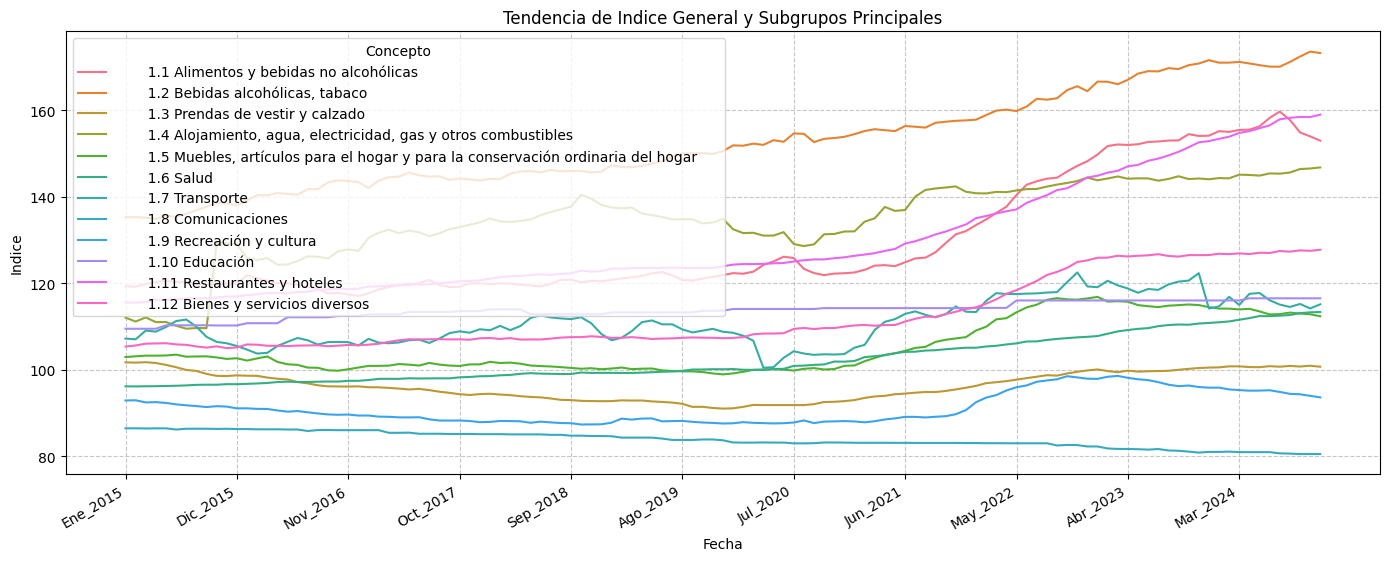

Guardado: Transporte_y_Servicios.csv
Graficando: Transporte y Servicios con gráfico tipo heatmap


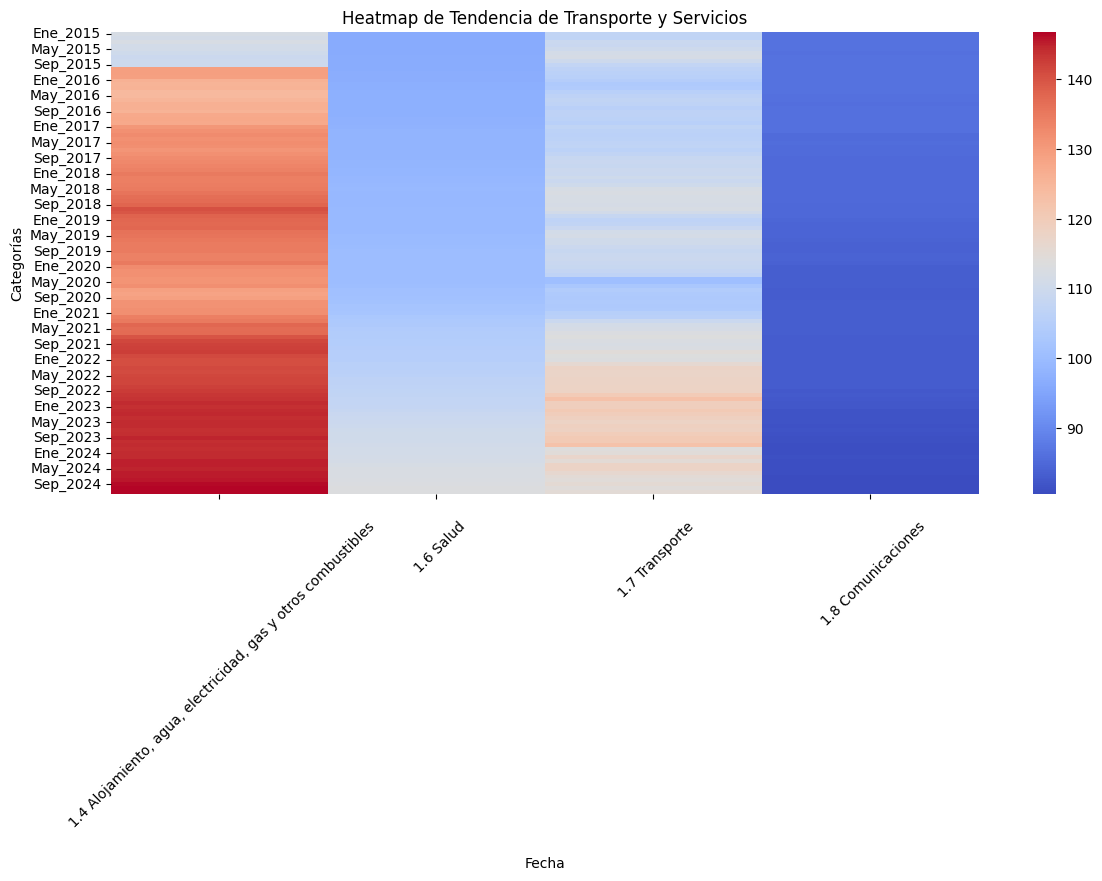

Guardado: Educacion_y_Cultura.csv
Graficando: Educacion y Cultura con gráfico tipo area


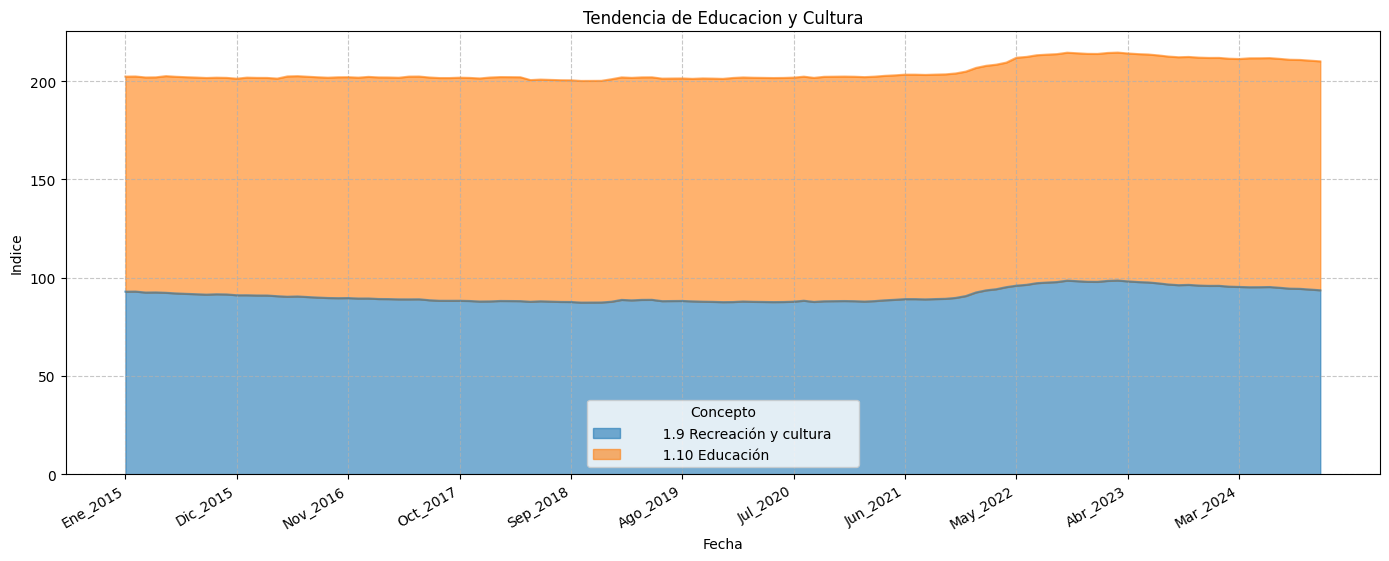

Guardado: Otros_Bienes_y_Servicios.csv
Graficando: Otros Bienes y Servicios con gráfico tipo scatter


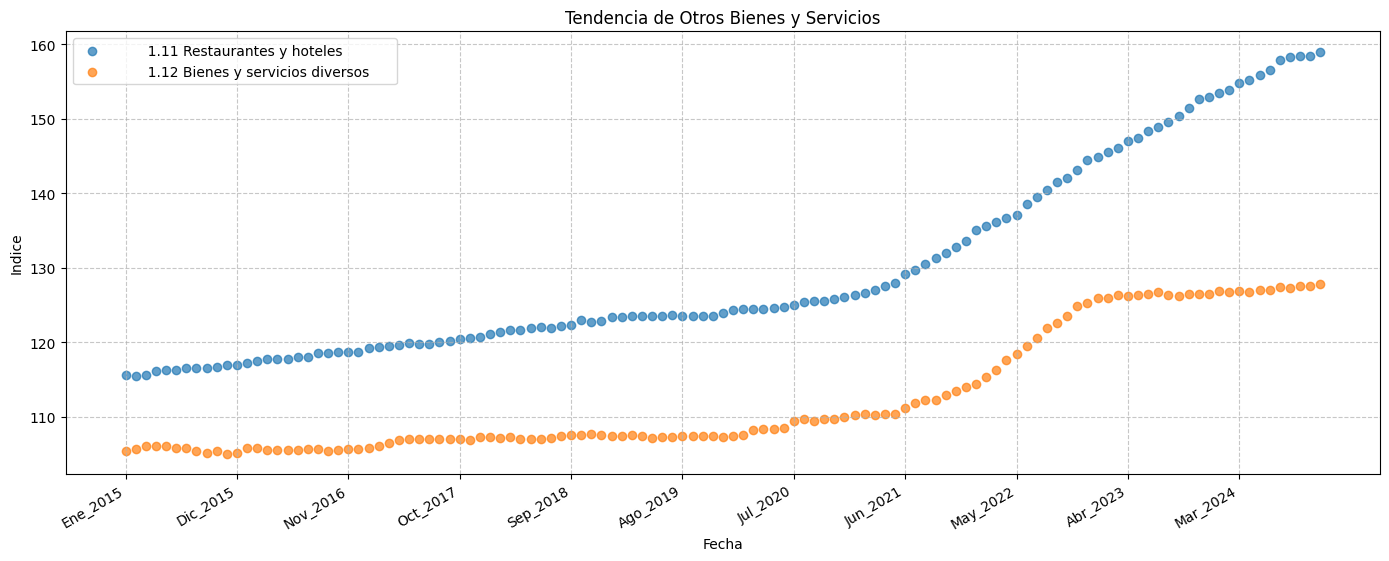

In [13]:
import pandas as pd  # Importa la librería para manejar y procesar datos en formato tabular
import matplotlib.pyplot as plt  # Importa la librería para crear gráficos
import seaborn as sns  # Importa Seaborn para hacer gráficos estadísticos más estilizados

# Cargar datos desde un archivo CSV
DatosIPC = pd.read_csv("\u00cdndice_de_Precios_al_Consumidor_(IPC).csv", skiprows=3)  # Carga el archivo CSV, ignorando las primeras 3 filas

# Procesar encabezados
DatosIPC.columns = DatosIPC.iloc[0].fillna('Concepto')  # La primera fila se usa como nombres de columnas, reemplazando valores nulos por 'Concepto'
DatosIPC = DatosIPC[1:].reset_index(drop=True)  # Elimina la primera fila de datos, ya usada como encabezado
DatosIPC = DatosIPC.rename(columns={DatosIPC.columns[0]: 'Concepto'})  # Renombra la primera columna como 'Concepto'
DatosIPC = DatosIPC.dropna(subset=['Concepto'])  # Elimina filas donde la columna 'Concepto' sea nula
DatosIPC = DatosIPC[~DatosIPC['Concepto'].str.contains('Notas', na=False)]  # Excluye filas con la palabra 'Notas'

# Agregar prefijo de año a los meses
anio_base = 2015  # Define el año base para empezar a numerar
meses_columnas = DatosIPC.columns[1:]  # Obtiene los nombres de columnas que representan meses
columnas_actualizadas = ['Concepto']  # Inicializa una lista con el encabezado 'Concepto'
for i, mes in enumerate(meses_columnas):  # Itera sobre los meses
    anio = anio_base + (i // 12)  # Calcula el año según la posición del mes
    columnas_actualizadas.append(f"{mes}_{anio}")  # Actualiza el nombre de la columna con el mes y el año
DatosIPC.columns = columnas_actualizadas  # Reemplaza las columnas con los nombres actualizados

# Llenar valores nulos con la media de cada columna
for col in DatosIPC.columns[1:]:  # Itera sobre las columnas que no son 'Concepto'
    if pd.api.types.is_numeric_dtype(DatosIPC[col]):  # Verifica si la columna es numérica
        DatosIPC[col] = DatosIPC[col].fillna(DatosIPC[col].mean(skipna=True))  # Llena valores nulos con la media de la columna

# Establecer la columna 'Concepto' como índice
DatosIPC.set_index('Concepto', inplace=True)  # Configura la columna 'Concepto' como índice de la tabla

# Crear categorías basadas en los valores de la columna 'Concepto'
categorias = {  # Define un diccionario con las categorías y sus filtros
    'Indice General y Subgrupos Principales': DatosIPC[DatosIPC.index.str.contains(r'^ {1,}1\.', na=False)],  # Filtra por el patrón '1.'
    'Transporte y Servicios': DatosIPC[DatosIPC.index.str.contains(r'(Transporte|Comunicaciones|Salud|Alojamiento)', case=False)],  # Filtra por palabras clave
    'Educacion y Cultura': DatosIPC[DatosIPC.index.str.contains(r'(Educación|Recreación)', case=False)],  # Filtra por palabras clave
    'Otros Bienes y Servicios': DatosIPC[DatosIPC.index.str.contains(r'(Restaurantes|Bienes y servicios diversos)', case=False)],  # Filtra por palabras clave
}

# Guardar categorías en archivos CSV
def guardar_categoria(df, nombre):  # Define una función para guardar los datos en un archivo CSV
    file_name = f"{nombre.replace(' ', '_')}.csv"  # Genera el nombre del archivo eliminando espacios
    df.to_csv(file_name)  # Guarda el DataFrame como CSV
    print(f"Guardado: {file_name}")  # Imprime confirmación

# Graficar categorías con diferentes tipos de gráficos
def graficar_categoria(df, titulo, tipo):  # Define una función para crear gráficos
    # Asegurar que las columnas sean numéricas y descartar columnas no numéricas
    df_numeric = df.apply(pd.to_numeric, errors='coerce').dropna(axis=1, how='all')  # Convierte columnas a numéricas y elimina las no válidas
    df_numeric = df_numeric.T  # Transpone los datos para graficar series temporales

    plt.figure(figsize=(14, 6))  # Define el tamaño del gráfico

    if tipo == 'lineplot':  # Gráfico de línea
        sns.lineplot(data=df_numeric, dashes=False)

    elif tipo == 'heatmap':  # Gráfico de mapa de calor
        sns.heatmap(df_numeric, cmap='coolwarm', annot=False, cbar=True)
        plt.title(f"Heatmap de {titulo}")
        plt.xlabel("Fecha")
        plt.ylabel("Categorías")
        plt.xticks(rotation=45)  # Rota las etiquetas del eje X
        plt.show()
        return

    elif tipo == 'area':  # Gráfico de área
        df_numeric.plot(kind='area', alpha=0.6, ax=plt.gca())

    elif tipo == 'scatter':  # Gráfico de dispersión
        for col in df_numeric.columns:  # Itera sobre las columnas
            plt.scatter(df_numeric.index, df_numeric[col], label=col, alpha=0.7)  # Crea un gráfico de dispersión
        plt.legend()  # Muestra la leyenda

    # Configuración del gráfico
    plt.title(titulo)  # Título del gráfico
    plt.xlabel('Fecha')  # Etiqueta del eje X
    plt.ylabel('Indice')  # Etiqueta del eje Y

    # Mostrar menos etiquetas en el eje X
    step = max(1, len(df_numeric.index) // 10)  # Muestra aproximadamente 10 etiquetas
    plt.xticks(range(0, len(df_numeric.index), step), df_numeric.index[::step], rotation=45)  # Configura las etiquetas

    plt.grid(visible=True, linestyle="--", alpha=0.7)  # Activa la cuadrícula
    plt.tight_layout()  # Ajusta el diseño para evitar sobreposiciones
    plt.gcf().autofmt_xdate()  # Ajusta automáticamente las fechas
    plt.show()  # Muestra el gráfico

# Iterar sobre cada categoría, guardar y graficar
tipos_graficos = ['lineplot', 'heatmap', 'area', 'scatter']  # Lista de tipos de gráficos

for i, (categoria, df) in enumerate(categorias.items()):  # Itera sobre las categorías
    guardar_categoria(df, categoria)  # Guarda los datos de la categoría en un archivo CSV
    tipo_grafico = tipos_graficos[i % len(tipos_graficos)]  # Selecciona el tipo de gráfico
    print(f"Graficando: {categoria} con gráfico tipo {tipo_grafico}")  # Mensaje informativo
    graficar_categoria(df, f"Tendencia de {categoria}", tipo_grafico)  # Crea el gráfico